In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#This sets the maximum number of rows Pandas should output when printing out various output:
pd.options.display.max_rows = None
#This sets the maximum number of columns Pandas should output when printing out various output:
pd.options.display.max_columns = None

In [10]:
df = pd.read_csv("Churn_Modelling.csv", delimiter = ',')
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [11]:
df.shape

(10000, 14)

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [14]:
df = df.drop(["RowNumber","CustomerId", "Surname"], axis =1)
df["Geography"].replace({"France": "London", "Germany": "Istanbul", "Spain": "Los Angeles"}, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,London,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Los Angeles,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,London,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,London,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Los Angeles,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

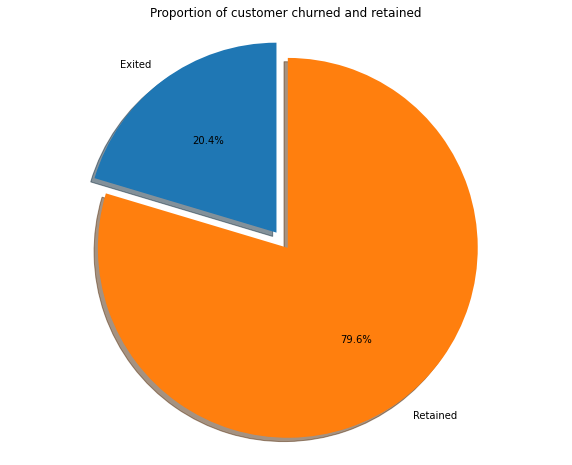

In [16]:
labels = ('Exited' , 'Retained')
sizes = [df.Exited[df["Exited"] == 1 ].count(), df.Exited[df["Exited"] == 0].count()]
explode = (0, 0.1) #separation slice
fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, labels = labels, explode = explode, autopct = '%1.1f%%',
                         shadow=True, startangle=90)
#autopct enables you to display the percent value using Python string formatting
plt.axis("equal") #OR plt.axis("scaled")
plt.title("Proportion of customer churned and retained")
plt.show()


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

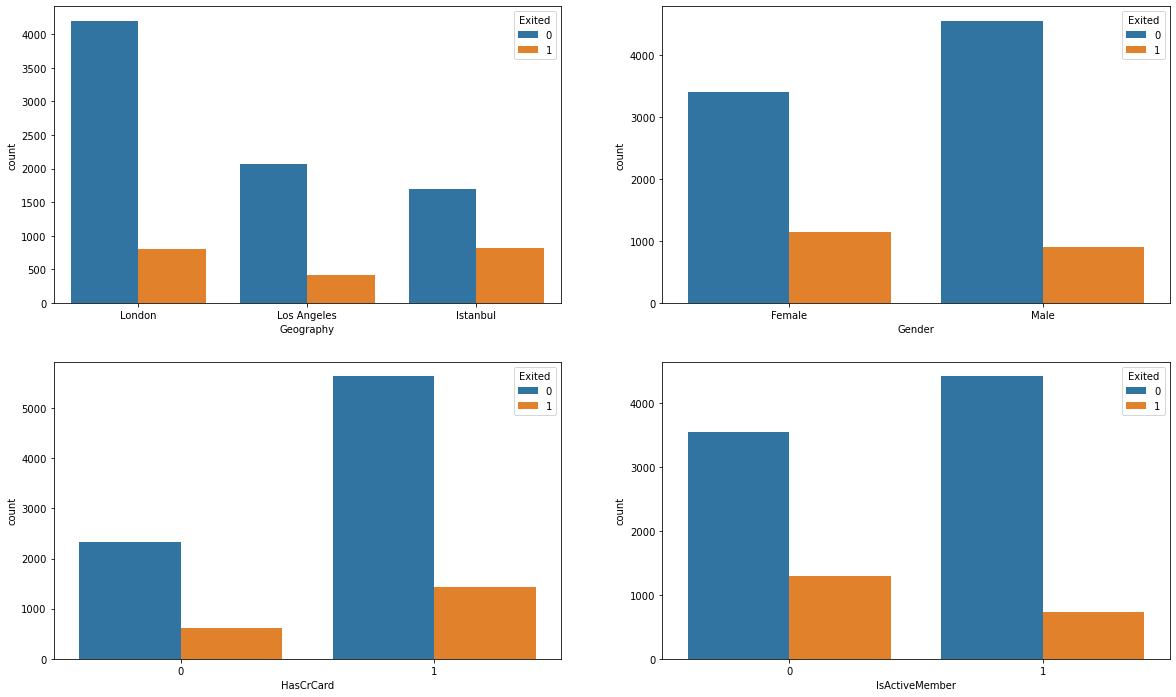

In [26]:
#the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize = (20,12))
sns.countplot(x="Geography", hue ="Exited", data= df, ax = axarr[0][0])
sns.countplot(x= "Gender", hue ="Exited", data= df, ax = axarr[0][1])
sns.countplot(x= "HasCrCard", hue= "Exited", data= df, ax =axarr[1][0])
sns.countplot(x= "IsActiveMember", hue= "Exited", data= df, ax =axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

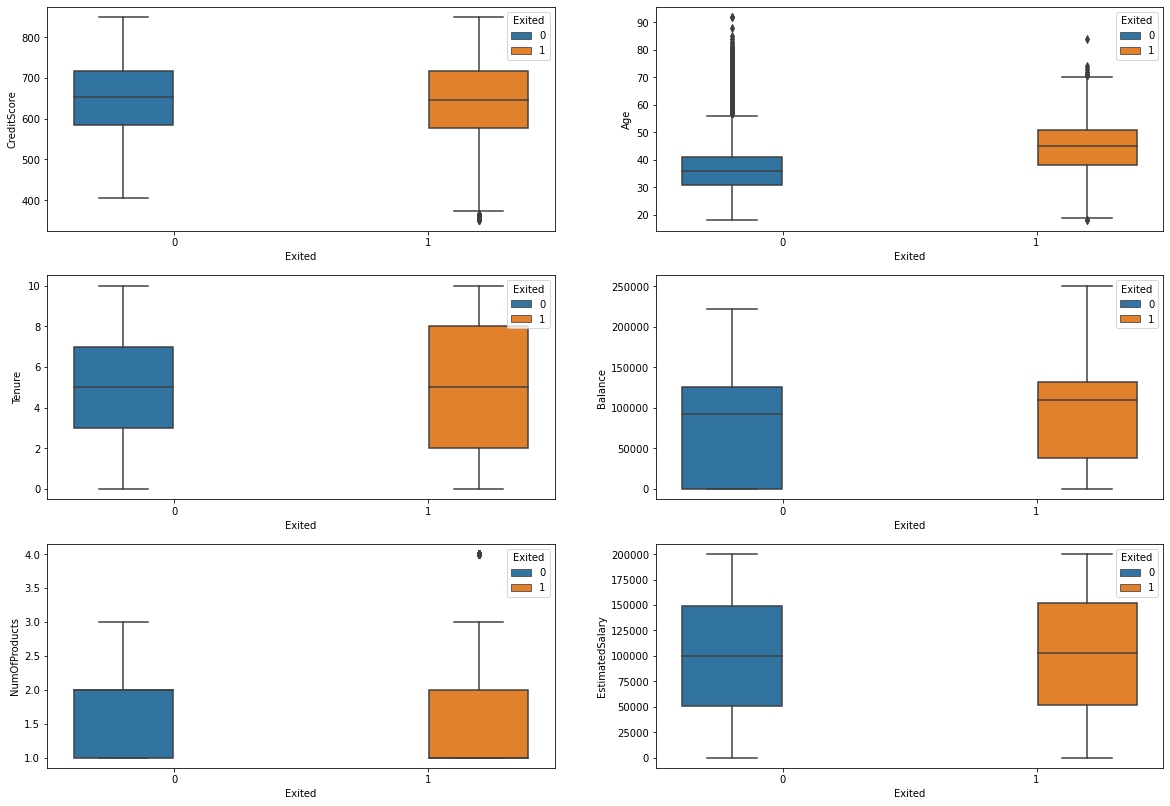

In [40]:
fig, ax = plt.subplots(3,2, figsize= (20,14))
sns.boxplot(y="CreditScore", x= "Exited", hue = "Exited", data =df, ax = ax[0][0])
sns.boxplot(y="Age", x= "Exited", hue = "Exited", data =df, ax = ax[0][1])
sns.boxplot(y="Tenure", x= "Exited", hue = "Exited", data =df, ax = ax[1][0])
sns.boxplot(y="Balance", x= "Exited", hue = "Exited", data =df, ax = ax[1][1])
sns.boxplot(y="NumOfProducts", x= "Exited", hue = "Exited", data =df, ax = ax[2][0])
sns.boxplot(y="EstimatedSalary", x= "Exited", hue = "Exited", data =df, ax = ax[2][1])

In [49]:
df_train = df.sample(frac = 0.8, random_state = 200)
df_test = df.drop(df_train.index)
print(df_train.shape)
print(df_test.shape)

(8000, 11)
(2000, 11)


(-1.0, 5.0)

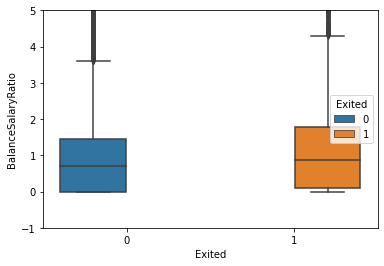

In [56]:
df_train["BalanceSalaryRatio"] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y= "BalanceSalaryRatio", x= "Exited", hue= "Exited", data= df_train)
plt.ylim(-1, 5)

(-1.0, 1.0)

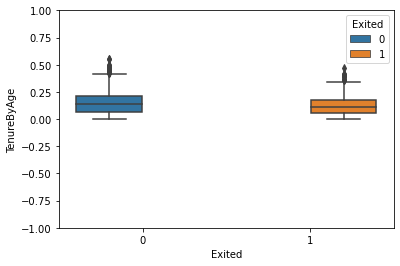

In [57]:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)

In [58]:
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)
df_train.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Los Angeles,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,London,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,London,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Istanbul,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,London,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706
